#Obligatorio Machine Learning, Luis Porras y Ramiro Sosa

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from google.colab import drive, files

import io
from sklearn.impute import SimpleImputer #Para rellenar valores null numericos
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder #Para normalizar los datos

In [ ]:
# Carga de los datos (desde drive)
drive.mount('/content/drive', force_remount=True)

df_original=pd.read_csv("/content/drive/My Drive/Machine Learning/Obligatorio/games_vapor.csv", sep=",")
df_original

Mounted at /content/drive


Game Title    Year                    Publisher  \
0      Bloodstained: Curse of the Moon  2007.0                          NaN   
1                   Plants vs. Zombies  2007.0                          NaN   
2       Zero Escape: Zero Time Dilemma  2007.0                          NaN   
3      Zelda II: The Adventure of Link  1987.0                     Nintendo   
4                           Yume Nikki  2007.0                          NaN   
...                                ...     ...                          ...   
11025                 Pac-Man Party 3D  2011.0           Namco Bandai Games   
11026         Full Auto 2: Battlelines  2006.0                         Sega   
11027       Matchbox Cross Town Heroes  2002.0                          THQ   
11028                          2Xtreme  1996.0  Sony Computer Entertainment   
11029                    Zoids: Legacy  2003.0             Tomy Corporation   

       North America  Europe  Japan  Rest of World  Global Number of Reviews  \
0               0.08    0.02   0.00           0.01    0.17             341.0   
1               0.08    0.02   0.00           0.01    0.17             719.0   
2               0.08    0.02   0.00           0.01    0.17             350.0   
3               2.19    0.50   1.61           0.08    4.38             756.0   
4               0.08    0.02   0.00           0.01    0.17             770.0   
...              ...     ...    ...            ...     ...               ...   
11025           0.09    0.04   0.00           0.01    0.15             100.0   
11026           0.14    0.02   0.00           0.02    0.18             100.0   
11027           0.12    0.04   0.00           0.00    0.17             100.0   
11028           1.15    0.20   0.00           0.05    1.40             100.0   
11029           0.06    0.02   0.00           0.00    0.08             100.0   

                                                 Summary Wishlist Platform  \
0      “Bloodstained: Curse of the Moon” is packed wi...    397.0     2600   
1      Zombies are invading your home, and the only d...     82.0     2600   
2      Zero Time Dilemma is the third and final entry...    402.0     2600   
3      Zelda II: The Adventure of Link is the second ...    290.0      NES   
4      Yume Nikki is a 32-Bit freeware game created b...    771.0     2600   
...                                                  ...      ...      ...   
11025                                                NaN    100.0      3DS   
11026                                                NaN    100.0      PS3   
11027                                                NaN    100.0      GBA   
11028                                                NaN    100.0       PS   
11029                                                NaN    100.0      GBA   

              Genre    Rating  
0          Platform  7.345609  
1            Puzzle  6.511195  
2            Puzzle  6.651093  
3         Adventure  7.900000  
4         Adventure  7.152074  
...             ...       ...  
11025          Misc  6.708751  
11026        Racing  7.326703  
11027        Racing  7.153739  
11028        Sports  8.169337  
11029  Role-Playing  7.333377  

[11030 rows x 14 columns]

##Ejercicio 1 Procesamiento de Datos


In [ ]:
# Número de filas y columnas en el data frame
df_original.shape

(11030, 14)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Game Title         11030 non-null  object 
 1   Year               11014 non-null  float64
 2   Publisher          9992 non-null   object 
 3   North America      11030 non-null  float64
 4   Europe             11030 non-null  float64
 5   Japan              11030 non-null  float64
 6   Rest of World      11030 non-null  float64
 7   Global             11030 non-null  float64
 8   Number of Reviews  11030 non-null  object 
 9   Summary            1098 non-null   object 
 10  Wishlist           11030 non-null  object 
 11  Platform           11030 non-null  object 
 12  Genre              11030 non-null  object 
 13  Rating             11030 non-null  float64
dtypes: float64(7), object(7)
memory usage: 1.2+ MB


In [ ]:
# Porcentaje de valores nulos
df_original.isnull().mean()

Game Title           0.000000
Year                 0.001451
Publisher            0.094107
North America        0.000000
Europe               0.000000
Japan                0.000000
Rest of World        0.000000
Global               0.000000
Number of Reviews    0.000000
Summary              0.900453
Wishlist             0.000000
Platform             0.000000
Genre                0.000000
Rating               0.000000
dtype: float64

Vemos que Summary para esta primer parte no nos va a influir en el análisis en busca de una relación con rating. A su vez en el siguiente bloque ya crearemos funciones que nos permitan rellenar todo aquello que sea NaN para poder tener una tabla la cual normalizar

In [ ]:
# Function to convert strings with suffixes to floats
def convert_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000
    return float(value)  # No suffix


def transform_columns_and_values(df):
    df['Wishlist'] = df['Wishlist'].apply(convert_to_float)
    df['Number of Reviews'] = df['Number of Reviews'].apply(convert_to_float)
    df['Publisher'] = df['Publisher'].fillna('Unknown')

    #Rellenar los valores faltantes en "Summary" con Unknown, aca preguntamos ya que en la tabla test no aparece la columna Summary
    if "Summary" in df.columns:
        df['Summary'] = df['Summary'].fillna('Unknown')

    #Rellenar valores faltantes en variables numéricas
    df['Year'] = df['Year'].fillna(0)

In [ ]:
df = df_original.copy()
transform_columns_and_values(df)

In [ ]:
df['Wishlist']

0        397.0
1         82.0
2        402.0
3        290.0
4        771.0
         ...  
11025    100.0
11026    100.0
11027    100.0
11028    100.0
11029    100.0
Name: Wishlist, Length: 11030, dtype: float64

Ahora vamos a tratar las columnas Genre, Platform y Publisher de manera categorica colocandole un label encoder, y a su vez ya normalizaremos todas las columnas hasta este momento

In [ ]:
def fit_and_learn_label_encoder(df,categorical_columns_names):
        label_encoders = {}
        for column in categorical_columns_names :
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column].astype(str))  # Convertir NaNs en Strings
            label_encoders[column] = le
        return label_encoders


def fit_label_encoder(df,categorical_columns_names,label_encoders):
        for column in categorical_columns_names :
            le = label_encoders[column]
            df[column] = le.fit_transform(df[column].astype(str))  # Convertir NaNs en Strings


#def fit_and_learn_scaler(df,numeric_columns_names):
     # # Aplicar Min-Max Scaling
 #   scaler = MinMaxScaler()
  #  df[numeric_columns_names] = scaler.fit_transform(df[numeric_columns_names])
   # return scaler

def fit_scaler(df,numeric_columns_names,scaler):
     # # Aplicar Min-Max Scaling
    df[numeric_columns_names] = scaler.fit_transform(df[numeric_columns_names])

In [ ]:
scaler = MinMaxScaler()
categorical_columns_names =  ['Publisher', 'Platform', 'Genre']
numeric_columns = ['Year','North America', 'Europe', 'Japan', 'Rest of World', 'Global','Wishlist','Number of Reviews','Rating']
label_encoders_guardados = fit_and_learn_label_encoder(df, categorical_columns_names)
numeric_and_categorical_columns = ['Year','Publisher','North America', 'Europe', 'Japan', 'Rest of World', 'Global','Wishlist','Number of Reviews','Platform', 'Genre']
fit_scaler(df,numeric_and_categorical_columns,scaler)


In [ ]:
scaler

MinMaxScaler()

In [ ]:
for column, le in label_encoders_guardados.items():
    print(f"Clases aprendidas por el `LabelEncoder` para '{column}': {le.classes_}")


Clases aprendidas por el `LabelEncoder` para 'Publisher': ['10TACLE Studios' '1C Company' '20th Century Fox Video Games' '2D Boy'
 '3DO' '49Games' '505 Games' '5pb' '7G//AMES' '989 Sports' '989 Studios'
 'AQ Interactive' 'ASC Games' 'ASCII Entertainment' 'ASCII Media Works'
 'ASK' 'Acclaim Entertainment' 'Accolade' 'Ackkstudios' 'Acquire'
 'Activision' 'Activision Value' 'Aerosoft' 'Agatsuma Entertainment'
 'Agetec' 'Aksys Games' 'Alawar Entertainment' 'Alchemist'
 'Alternative Software' 'Altron' 'Alvion' 'American Softworks'
 'Angel Studios' 'Answer Software' 'Aqua Plus' 'Aques' 'Arc System Works'
 'Aria' 'Arika' 'ArtDink' 'Aruze Corp' 'Ascaron Entertainment'
 'Ascaron Entertainment GmbH' 'Asgard' 'Asmik Ace Entertainment'
 'Asmik Corp' 'Aspyr' 'Astragon' 'Asylum Entertainment' 'Atari' 'Athena'
 'Atlus' 'Avalon Interactive' 'Avanquest' 'Avanquest Software' 'Axela'
 'BAM! Entertainment' 'BMG Interactive Entertainment' 'BPS' 'Banpresto'
 'Benesse' 'Berkeley' 'Bethesda Softworks' 'Big Be

In [ ]:
df

Game Title      Year  Publisher  North America  \
0      Bloodstained: Curse of the Moon  0.993564   0.924214       0.002751   
1                   Plants vs. Zombies  0.993564   0.924214       0.002751   
2       Zero Escape: Zero Time Dilemma  0.993564   0.924214       0.002751   
3      Zelda II: The Adventure of Link  0.983663   0.622921       0.075309   
4                           Yume Nikki  0.993564   0.924214       0.002751   
...                                ...       ...        ...            ...   
11025                 Pac-Man Party 3D  0.995545   0.600739       0.003095   
11026         Full Auto 2: Battlelines  0.993069   0.774492       0.004814   
11027       Matchbox Cross Town Heroes  0.991089   0.848429       0.004127   
11028                          2Xtreme  0.988119   0.792976       0.039546   
11029                    Zoids: Legacy  0.991584   0.890943       0.002063   

         Europe     Japan  Rest of World    Global  Number of Reviews  \
0      0.001553  0.000000       0.001328  0.003977           0.079302   
1      0.001553  0.000000       0.001328  0.003977           0.167209   
2      0.001553  0.000000       0.001328  0.003977           0.081395   
3      0.038820  0.157534       0.010624  0.108625           0.175814   
4      0.001553  0.000000       0.001328  0.003977           0.179070   
...         ...       ...            ...       ...                ...   
11025  0.003106  0.000000       0.001328  0.003480           0.023256   
11026  0.001553  0.000000       0.002656  0.004226           0.023256   
11027  0.003106  0.000000       0.000000  0.003977           0.023256   
11028  0.015528  0.000000       0.006640  0.034551           0.023256   
11029  0.001553  0.000000       0.000000  0.001740           0.023256   

                                                 Summary  Wishlist  Platform  \
0      “Bloodstained: Curse of the Moon” is packed wi...  0.073175  0.000000   
1      Zombies are invading your home, and the only d...  0.014820  0.000000   
2      Zero Time Dilemma is the third and final entry...  0.074102  0.000000   
3      Zelda II: The Adventure of Link is the second ...  0.053353  0.344828   
4      Yume Nikki is a 32-Bit freeware game created b...  0.142460  0.000000   
...                                                  ...       ...       ...   
11025                                            Unknown  0.018155  0.068966   
11026                                            Unknown  0.018155  0.551724   
11027                                            Unknown  0.018155  0.206897   
11028                                            Unknown  0.018155  0.482759   
11029                                            Unknown  0.018155  0.206897   

          Genre    Rating  
0      0.423077  7.345609  
1      0.500000  6.511195  
2      0.500000  6.651093  
3      0.038462  7.900000  
4      0.038462  7.152074  
...         ...       ...  
11025  0.307692  6.708751  
11026  0.576923  7.326703  
11027  0.576923  7.153739  
11028  0.846154  8.169337  
11029  0.653846  7.333377  

[11030 rows x 14 columns]

Ahora vamos a ver la correlacion de las columnas numericas con respecto a Rating

In [ ]:
corr_col = numeric_columns.copy()
corr_matrix = df[corr_col].corr()
corr_matrix['Rating'].sort_values(ascending=False)




Rating               1.000000
Global               0.488406
North America        0.464107
Europe               0.427301
Rest of World        0.397524
Japan                0.289782
Number of Reviews    0.063658
Wishlist             0.023078
Year                -0.002855
Name: Rating, dtype: float64

Como podemos hay una relacion directa entre Rating y las ventas

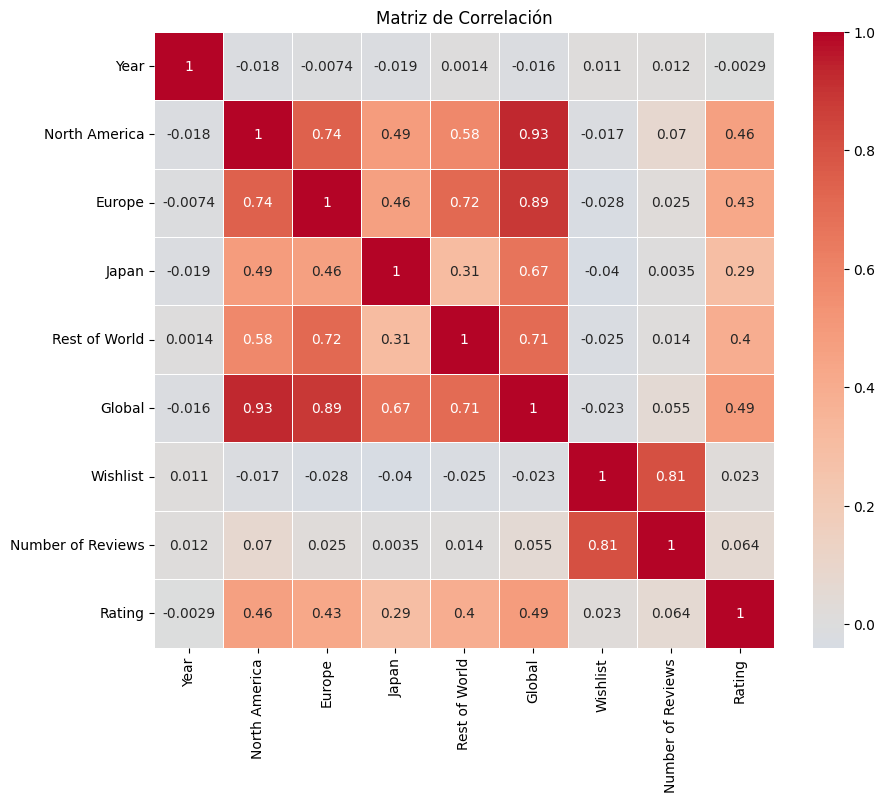

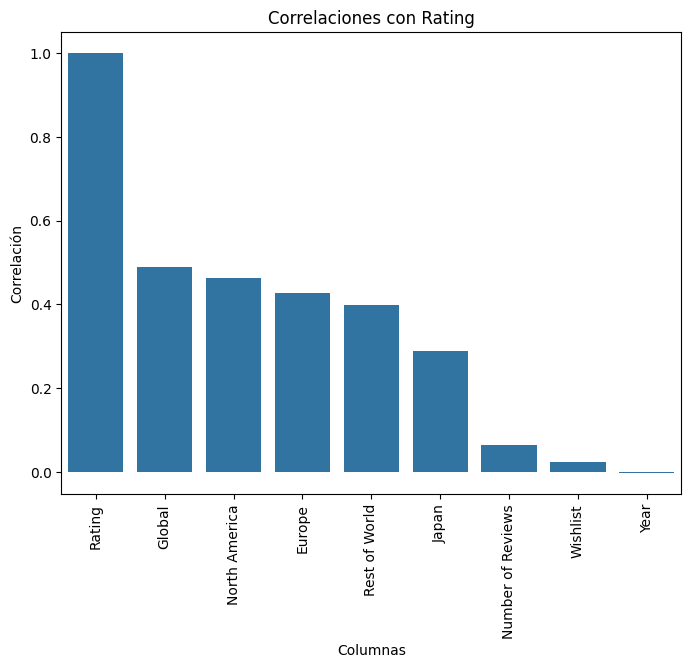

In [ ]:
# Visualizar la matriz de correlación completa
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Filtrar las correlaciones con 'Rating' y ordenarlas
correlations_with_rating = corr_matrix['Rating'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar las correlaciones con 'Rating'
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations_with_rating.index, y=correlations_with_rating.values)
plt.xticks(rotation=90)
plt.title('Correlaciones con Rating')
plt.xlabel('Columnas')
plt.ylabel('Correlación')
plt.show()

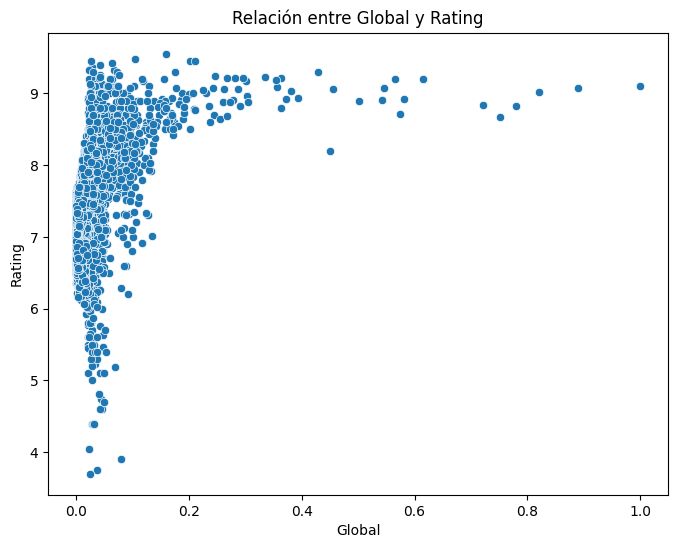

In [ ]:
#scatter plot con 'Global' y 'Rating'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Global', y='Rating')
plt.title('Relación entre Global y Rating')
plt.xlabel('Global')
plt.ylabel('Rating')
plt.show()

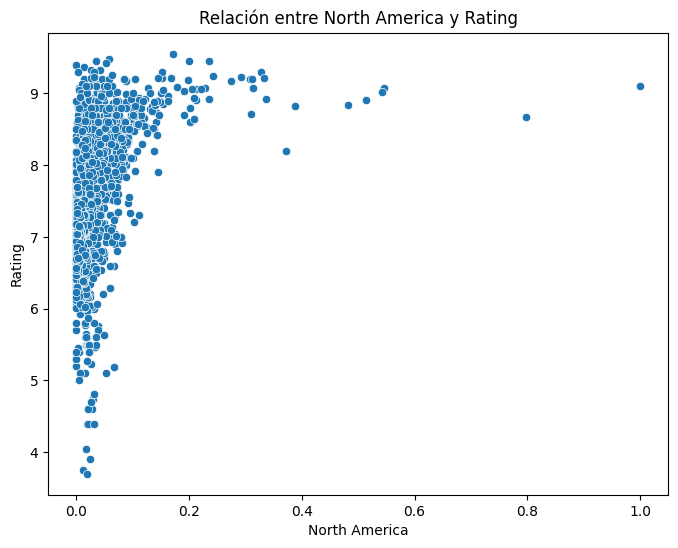

In [ ]:
#scatter plot con 'North America' y 'Rating'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='North America', y='Rating')
plt.title('Relación entre North America y Rating')
plt.xlabel('North America')
plt.ylabel('Rating')
plt.show()

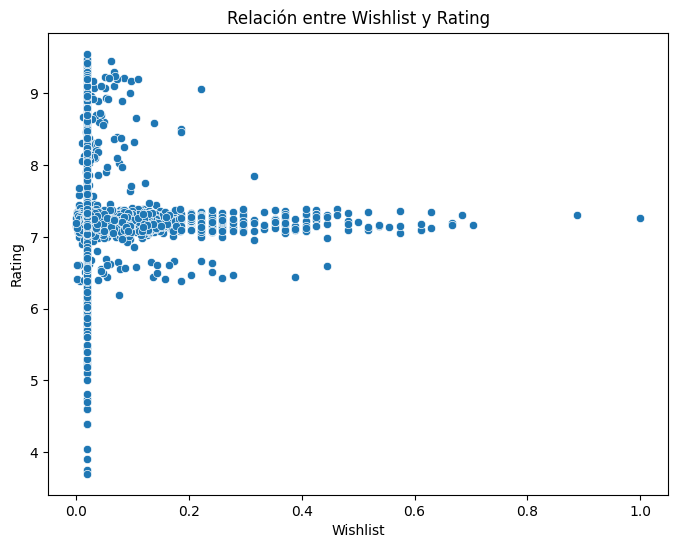

In [ ]:
#scatter plot con 'Wishlist' y 'Rating'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Wishlist', y='Rating')
plt.title('Relación entre Wishlist y Rating')
plt.xlabel('Wishlist')
plt.ylabel('Rating')
plt.show()

##Ejercicio 2 Feature Engineering

Buscaremos droppear en caso de ser necesario para poder entrenar los modelos, aparte de lo ya realizado en la primer parte como lo fue los label Encoder, la normalizacion y completar las celdas NaN

In [ ]:
df_feat_eng = df.copy()
corr_col_feat_eng = corr_col.copy()

In [ ]:
#Buscar si un Genero fue popular en algun año en particular y se asume que por ende tuvo un buen Rating
#genre_year_avg_rating = df_feat_eng.groupby(["Genre", "Year"])["Rating"].mean()
#df_feat_eng["Genre_Year_Avg_Rating"] = df_feat_eng.set_index(["Genre", "Year"]).index.map(genre_year_avg_rating)
#fit_scaler(df_feat_eng,['Genre_Year_Avg_Rating'],scaler)
#corr_col_feat_eng = corr_col_feat_eng + ['Genre_Year_Avg_Rating']

In [ ]:
#df_feat_eng[corr_col_feat_eng]

In [ ]:
#corr_matrix_feat_eng = df_feat_eng[corr_col_feat_eng].corr()
#corr_matrix_feat_eng['Rating'].sort_values(ascending=False)

In [ ]:
#publisher_rating_mean = df_feat_eng.groupby('Publisher')['Rating'].mean()
#df_feat_eng['Publisher_Rating_Mean'] = df_feat_eng['Publisher'].map(publisher_rating_mean)
#fit_scaler(df_feat_eng,['Publisher_Rating_Mean'],scaler)
#corr_col_feat_eng = corr_col_feat_eng + ['Publisher_Rating_Mean']

In [ ]:
#corr_matrix_feat_eng = df_feat_eng[corr_col_feat_eng].corr()
#corr_matrix_feat_eng['Rating'].sort_values(ascending=False)

In [ ]:
df_feat_eng_models = df_feat_eng.copy()
df_feat_eng_models.drop(columns=['Game Title','Summary'], inplace=True)





In [ ]:
df_feat_eng_models



Year  Publisher  North America    Europe     Japan  Rest of World  \
0      0.993564   0.924214       0.002751  0.001553  0.000000       0.001328   
1      0.993564   0.924214       0.002751  0.001553  0.000000       0.001328   
2      0.993564   0.924214       0.002751  0.001553  0.000000       0.001328   
3      0.983663   0.622921       0.075309  0.038820  0.157534       0.010624   
4      0.993564   0.924214       0.002751  0.001553  0.000000       0.001328   
...         ...        ...            ...       ...       ...            ...   
11025  0.995545   0.600739       0.003095  0.003106  0.000000       0.001328   
11026  0.993069   0.774492       0.004814  0.001553  0.000000       0.002656   
11027  0.991089   0.848429       0.004127  0.003106  0.000000       0.000000   
11028  0.988119   0.792976       0.039546  0.015528  0.000000       0.006640   
11029  0.991584   0.890943       0.002063  0.001553  0.000000       0.000000   

         Global  Number of Reviews  Wishlist  Platform     Genre    Rating  
0      0.003977           0.079302  0.073175  0.000000  0.423077  7.345609  
1      0.003977           0.167209  0.014820  0.000000  0.500000  6.511195  
2      0.003977           0.081395  0.074102  0.000000  0.500000  6.651093  
3      0.108625           0.175814  0.053353  0.344828  0.038462  7.900000  
4      0.003977           0.179070  0.142460  0.000000  0.038462  7.152074  
...         ...                ...       ...       ...       ...       ...  
11025  0.003480           0.023256  0.018155  0.068966  0.307692  6.708751  
11026  0.004226           0.023256  0.018155  0.551724  0.576923  7.326703  
11027  0.003977           0.023256  0.018155  0.206897  0.576923  7.153739  
11028  0.034551           0.023256  0.018155  0.482759  0.846154  8.169337  
11029  0.001740           0.023256  0.018155  0.206897  0.653846  7.333377  

[11030 rows x 12 columns]

##Ejercicio 3 Entrenamiento de Modelos

Vinculo con WandB

In [ ]:
!pip install wandb

In [ ]:
import wandb
wandb.login()

wandb: Currently logged in as: luisporras1997 (luisporras1997-universidad-ort-uruguay). Use `wandb login --relogin` to force relogin


True

###Modelo de Arbol de Decisión

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividir el dataset
X = df_feat_eng_models.drop(columns=['Rating'])  # Reemplaza 'Rating' con tu columna objetivo
y = df_feat_eng_models['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def train():
    # Inicializar una nueva ejecución en WandB para cada combinación de hiperparámetros
    wandb.init()

    # Obtener los hiperparámetros desde WandB Sweep
    config = wandb.config

    # Crear el modelo con los hiperparámetros del sweep
    model_Decision = DecisionTreeRegressor(
        max_depth=config.max_depth,
        min_samples_split=config.min_samples_split,
        min_samples_leaf=config.min_samples_leaf
    )

    # Entrenar el modelo
    model_Decision.fit(X_train, y_train)

    # Realizar predicciones
    predictions = model_Decision.predict(X_test)

    # Calcular MSE y MAE
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    # Registrar las métricas en WandB
    wandb.log({
        "mse": mse,
        "mae": mae
    })

    # Finalizar la ejecución de WandB
    wandb.finish()

In [ ]:
sweep_config_decision_tree = {
    'method': 'grid',
    'metric': {'name': 'mse', 'goal': 'minimize'},
    'parameters': {
        'max_depth': {'values': [3, 5, 7, 10]},
        'min_samples_split': {'values': [2, 4, 6]},
        'min_samples_leaf': {'values': [1, 2, 3]}
    }
}
sweep_id = wandb.sweep(sweep_config_decision_tree, project="Obligatorio ML Arbol Decision")


Create sweep with ID: yx3fera2
Sweep URL: https://wandb.ai/luisporras1997-universidad-ort-uruguay/Obligatorio%20ML%20Arbol%20Decision/sweeps/yx3fera2


In [ ]:
wandb.agent(sweep_id, function=train)

wandb: Agent Starting Run: p4m9hlnd with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: 6w66fam0 with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: nfku9tvr with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: ys56ogvk with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: 37hcxpoq with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: h8bfs1gw with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: plnojx6m with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: kx5umnta with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: tkbaf2ns with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: cvth08z5 with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: j27f5kl9 with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: su6czyfo with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: iv481lay with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: zapbpriq with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: 1oatxobs with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: i8de45sd with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: 5vzmjner with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: 1agmkxcw with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: z4g0q5a3 with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: 4cltkvxb with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: 963n5vyr with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: 726jsvxm with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: mcb2bxz1 with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: z6qdp1as with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: aft0ub5p with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: kcqcxu94 with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: a0slz44s with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: dy8njdyr with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: xup9pqj4 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: 1ilxdpas with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: uv434ite with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: 3m9y7qt6 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: v4wzz28c with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 6


wandb: Agent Starting Run: ehzhwyyj with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 2


wandb: Agent Starting Run: yaa1ep2x with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 4


wandb: Agent Starting Run: 5e64y8sl with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 3
wandb: 	min_samples_split: 6


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
import joblib

# Obtener el mejor run basado en 'mse'
api = wandb.Api()
runs = api.runs("luisporras1997-universidad-ort-uruguay/Obligatorio ML Arbol Decision")

# Filtrar el mejor run basado en la métrica de MSE
best_run = min(runs, key=lambda run: run.summary.get("mse", float('inf')))

# Mostrar los mejores hiperparámetros y métricas
print("Mejor modelo basado en MSE:")
print(f"MSE: {best_run.summary['mse']}")
print("Hiperparámetros:", best_run.config)

# Obtener los mejores hiperparámetros
best_hyperparams = best_run.config

# Crear y entrenar el modelo con los mejores hiperparámetros
model_Decision = DecisionTreeRegressor(
    max_depth=best_hyperparams["max_depth"],
    min_samples_split=best_hyperparams["min_samples_split"],
    min_samples_leaf=best_hyperparams["min_samples_leaf"]
)
model_Decision.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(model_Decision, "best_decision_tree_model.pkl")
print("Modelo guardado como 'best_decision_tree_model.pkl'")

Mejor modelo basado en MSE:
MSE: 0.08361418535657286
Hiperparámetros: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4}
Modelo guardado como 'best_decision_tree_model.pkl'


###Modelo de Regresión Lineal

In [ ]:
import wandb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_linear_regression():
    # Iniciar una nueva ejecución en WandB
    wandb.init()

    # Crear y entrenar el modelo de Regresión Lineal
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)

    # Realizar predicciones
    predictions = model_linear.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    # Registrar métricas en WandB
    wandb.log({
        "mse": mse,
        "mae": mae
    })

    # Finalizar la ejecución
    wandb.finish()

In [ ]:
# Dividir los datos
X = df_feat_eng_models_linear_neuro.drop(columns=['Rating'])
y = df_feat_eng_models_linear_neuro['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
sweep_config_linear = {
    'method': 'grid',
    'metric': {'name': 'mse', 'goal': 'minimize'},
    'parameters': {
        'fit_intercept': {'values': [True, False]}
    }
}
sweep_id_linear = wandb.sweep(sweep_config_linear, project="Obligatorio ML Regresion Lineal")

Create sweep with ID: 4axyada1
Sweep URL: https://wandb.ai/luisporras1997-universidad-ort-uruguay/Obligatorio%20ML%20Regresion%20Lineal/sweeps/4axyada1


In [ ]:
wandb.agent(sweep_id_linear, function=train_linear_regression)

wandb: Agent Starting Run: g8o9xbn9 with config:
wandb: 	fit_intercept: True


wandb: Agent Starting Run: qk8iry2i with config:
wandb: 	fit_intercept: False


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
import joblib

# Obtener el mejor run basado en MSE
api = wandb.Api()
runs = api.runs("luisporras1997-universidad-ort-uruguay/Obligatorio ML Regresion Lineal")

# Filtrar la mejor ejecución según la métrica 'mse'
best_run = min(runs, key=lambda run: run.summary.get("mse", float('inf')))

# Mostrar los mejores hiperparámetros y métricas
print("Mejor modelo basado en MSE:")
print(f"MSE: {best_run.summary['mse']}")
print(f"MAE: {best_run.summary['mae']}")
print("Hiperparámetros:", best_run.config)

# Entrenar el modelo con los mejores hiperparámetros
best_hyperparams = best_run.config

model_regresion_lineal = LinearRegression(fit_intercept=best_hyperparams["fit_intercept"])
model_regresion_lineal.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(model_regresion_lineal, "best_linear_regression_model.pkl")

Mejor modelo basado en MSE:
MSE: 0.003744432417483308
MAE: 0.038512204081505914
Hiperparámetros: {'fit_intercept': True}


['best_linear_regression_model.pkl']

###Modelo de Random Forest

In [ ]:
import wandb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

def train_random_forest_regressor():
    # Iniciar una nueva ejecución en WandB
    wandb.init()

    # Obtener los hiperparámetros desde WandB Sweep
    config = wandb.config

    # Crear y entrenar el modelo de Random Forest
    model_rf = RandomForestRegressor(
        n_estimators=config.n_estimators,
        max_depth=config.max_depth,
        min_samples_split=config.min_samples_split,
        min_samples_leaf=config.min_samples_leaf,
        random_state=42
    )
    model_rf.fit(X_train, y_train)

    # Realizar predicciones
    predictions = model_rf.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    # Registrar métricas en WandB
    wandb.log({
        "mse": mse,
        "mae": mae
    })

    # Finalizar la ejecución
    wandb.finish()

In [ ]:
# Dividir los datos
X = df_feat_eng_models.drop(columns=['Rating'])
y = df_feat_eng_models['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sweep_config_rf = {
    'method': 'bayes',
    'metric': {'name': 'mse', 'goal': 'minimize'},  # Optimizar la métrica 'mse'
    'parameters': {
        'n_estimators': {'values': [50, 100, 200, 300]},  # Número de árboles
        'max_depth': {'values': [None, 10, 20, 30]},
        'min_samples_split': {'values': [2, 5, 10]},
        'min_samples_leaf': {'values': [1, 2, 4]}
    }
}
sweep_id = wandb.sweep(sweep_config_rf, project="Obligatorio ML Random Forest")

Create sweep with ID: fkmc28cq
Sweep URL: https://wandb.ai/luisporras1997-universidad-ort-uruguay/Obligatorio%20ML%20Random%20Forest/sweeps/fkmc28cq


In [ ]:
wandb.agent(sweep_id, function=train_random_forest_regressor, count=50)

wandb: Agent Starting Run: 7yv4ev0v with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 7ke8qj48 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: lse12k4f with config:
wandb: 	max_depth: None
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: g88fqmrz with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 8z1nsr8l with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: nw0001hl with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: sia9te0s with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 5dht2prs with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 13qlztw1 with config:
wandb: 	max_depth: None
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: k5qri2o7 with config:
wandb: 	max_depth: None
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: fth8coq1 with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 79k8euwx with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ertv33dk with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: gw4sxbw6 with config:
wandb: 	max_depth: None
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: osdvdl57 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: f4sate21 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: kqx9p687 with config:
wandb: 	max_depth: None
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: yvcif9bu with config:
wandb: 	max_depth: None
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: fi5kbxv4 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: o601do8z with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 4y9909ey with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: pzfiqjkj with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sh667k8w with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: bvfkto0s with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: k86nww2h with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: zf25337w with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: m9jxeh80 with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: dp6hd2tt with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8dnsy53u with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: zjhv452u with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: bvq1qa4c with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: hixybs61 with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: zww74xqy with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: ycv3fp7i with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 3ekbam99 with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xetaemfu with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: dsvcf8we with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: eizdif78 with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 8ma8oj5z with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: xmz2m4iw with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 8ub84pwo with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: telbgwor with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ui6qrpdu with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: qjv489oh with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: w59n69ih with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 077l9yrw with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: wirqg35o with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: lfpwvxmt with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: zcxdojea with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: cp6ty3pk with config:
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


Nota: Usamos el método "Grid" para recorrer todas las posibles combinaciones de Hiperparámetros

In [ ]:
# Obtener el mejor run basado en 'mse'
api = wandb.Api()
runs = api.runs("luisporras1997-universidad-ort-uruguay/Obligatorio ML Random Forest")

# Filtrar el mejor run basado en la métrica de MSE
best_run = min(runs, key=lambda run: run.summary.get("mse", float('inf')))

# Mostrar los mejores hiperparámetros y métricas
print("Mejor modelo basado en MSE:")
print(f"MSE: {best_run.summary['mse']}")
print("Hiperparámetros:", best_run.config)

# Entrenar el modelo con los mejores hiperparámetros
best_hyperparams = best_run.config
model_rf = RandomForestRegressor(
    n_estimators=best_hyperparams["n_estimators"],
    max_depth=best_hyperparams["max_depth"],
    min_samples_split=best_hyperparams["min_samples_split"],
    min_samples_leaf=best_hyperparams["min_samples_leaf"],
    random_state=42
)
model_rf.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(model_rf, "best_random_forest_regressor_model.pkl")

Mejor modelo basado en MSE:
MSE: 0.06307731253572935
Hiperparámetros: {'max_depth': 30, 'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 10}


['best_random_forest_regressor_model.pkl']

###Modelo de Boosting

In [ ]:
import wandb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

def train_gradient_boosting():
    # Iniciar una nueva ejecución en WandB
    wandb.init()

    # Obtener los hiperparámetros desde WandB Sweep
    config = wandb.config

    # Crear y entrenar el modelo de Gradient Boosting
    model_boosting = GradientBoostingRegressor(
        n_estimators=config.n_estimators,
        learning_rate=config.learning_rate,
        max_depth=config.max_depth,
        min_samples_split=config.min_samples_split,
        min_samples_leaf=config.min_samples_leaf,
        random_state=42
    )
    model_boosting.fit(X_train, y_train)

    # Realizar predicciones
    predictions = model_boosting.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    # Registrar métricas en WandB
    wandb.log({
        "mse": mse,
        "mae": mae
    })

    # Finalizar la ejecución
    wandb.finish()

In [ ]:
# Dividir los datos
X = df_feat_eng_trees.drop(columns=['Rating'])
y = df_feat_eng_trees['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sweep_config_boosting = {
    'method': 'grid',
    'metric': {'name': 'mse', 'goal': 'minimize'},  # Optimizar la métrica 'mse'
    'parameters': {
        'n_estimators': {'values': [50, 100, 200, 300]},  # Número de árboles
        'learning_rate': {'values': [0.01, 0.05, 0.1, 0.2]},  # Tasa de aprendizaje
        'max_depth': {'values': [3, 4, 5, 6]},
        'min_samples_split': {'values': [2, 5, 10]},
        'min_samples_leaf': {'values': [1, 2, 4]}
    }
}
sweep_id = wandb.sweep(sweep_config_boosting, project="Obligatorio ML Gradient Boosting")

Create sweep with ID: rpcij7cg
Sweep URL: https://wandb.ai/luisporras1997-universidad-ort-uruguay/Obligatorio%20ML%20Gradient%20Boosting/sweeps/rpcij7cg


In [ ]:
wandb.agent(sweep_id, function=train_gradient_boosting)

wandb: Agent Starting Run: ptjkr31h with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: n1jsqtzv with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 7gepp67w with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: psf8de04 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: m8v44rqm with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: zrekswi4 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 40i6onto with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: tqyl8tub with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 4nxsewl9 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: o8j1nzsm with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: yxet1r3e with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: brv5epvu with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: ohay9lgk with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: ymmpd102 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 18e94v8a with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: cfcno544 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: zkw8ecx7 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 73qlv9rq with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 81xh8s0r with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 0cxflbn9 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: uw7kru6o with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 88zq92fh with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: rt7zkc4j with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: gzavnxov with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: iahclftb with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: ys3tir4t with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: m8wh99tx with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: gskcu0wy with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: c7nz1pdp with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: xis25kom with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: d5dt9mu7 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 5ua9t334 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: nhqml7rg with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: mqz4hq6y with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: y5j86kfv with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 1ar16jn2 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: zxxmd2hx with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 9nqg2h00 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: zh0qi0fu with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 373djmd7 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: wco5kjnq with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 35clf3l9 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: fyl9t682 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: s9buw1zw with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: x7pszve5 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: cln8aswz with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: zg988ey6 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: elon5eyb with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: akkxn1yd with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: som0adxw with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: cwqdrty9 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: jbi1kp12 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: jdbs070o with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: w4swy69d with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 0d8caq9m with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: k1fo6z6w with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: y9a63jb8 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: oyw95c7i with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: f9zwt03a with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 1h7hf5gy with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: myevphyb with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 1ez295ng with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: jggawya2 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: q6btkpt1 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: rkffg13i with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 47gn1ggz with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 9c0ohl10 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 5q6tn4dw with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: bcrn1dvl with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: eza8w49e with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: vcc35jnn with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ovwwjrpj with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: phxi7tia with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: zm1lu8bf with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 4ojvun3b with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: oqp9fgnc with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: wf9rkdoq with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 4z8d3pbw with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: ghzzzcll with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: gn658gry with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: x53cpp7i with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: n8jytklu with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: om4xppwx with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: lbh0u89b with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: sek5kskq with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: yn84ruel with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: xycerdmx with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: rweath5n with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: k40us6y4 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 7wny4zjj with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: bfxtha9o with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: fk44v7w6 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: atbvsuto with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: sy2hzyi2 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 566632pl with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: st27456z with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: pgfcgmyk with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 33th4iqs with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: h1azdcrs with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 4q6zuslm with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 8xo1m9mn with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: jxv5uxqh with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 9ltgtzb3 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 2aip46o5 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: xy13slfp with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: gcxxogqj with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 9uvel6v9 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: pp4kmt6w with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: j2lxlme9 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 345gnmak with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 8eoczp8q with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: w60jevpl with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 35endoqv with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 2399x3t4 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: sdrck6rg with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 7f6xzfi3 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gsnwg6yp with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: opk1gkec with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: xji1be4v with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: yp1wct5e with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 68h1j3ti with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: l7heb8tz with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: nqdg2r9n with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 74tuib5v with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: td9kyoc4 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: e8nr91zm with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: d7pevomf with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: xdanpsnd with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6kuoscxe with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4lmybtoz with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 1u25vv06 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: fe1qx8qc with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: xkmulk2x with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 0qr2ur2b with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: cc83m3oc with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6esev49i with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: qmeu5yhx with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: o604gpwu with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 7jgas4fq with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: twha7luf with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 6348nhwh with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 3xll4leh with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hizlq56o with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 40vk1fg9 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: jf1fmlfd with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: uwx5kcjw with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: z9u3n9sf with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: s7z1akb4 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 0zyltcfh with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: vovigs27 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 80dcx36a with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: j0eif3cb with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 6kjwqzz1 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: ajlhxb5c with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 4qjhf2nc with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: utjma7f9 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: xtjqpsf4 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: gz0fv23e with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: usvj8l9p with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: xw6ogh0a with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: i3n51yjr with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: hktw0ppa with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: q711o3uf with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 8yk9kz8y with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: ov6strhf with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: b05o9xzc with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: nqm63a9e with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 1l16u6li with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: gor0h2xe with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 987de5nx with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: tpq8zgwc with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: a90s6cni with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: o8kncjt4 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: utta37dr with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 19nv82ie with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: f80q09mc with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: ld9ecw30 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 539n0l8h with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: xo2lg2wr with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 2293orpz with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: rci1s5fi with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: ohz2h1jo with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: c49n3nvz with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 5nitblkt with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 3y4r3ljz with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: i357srys with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: fgwgl1ts with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 4ze33gaw with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 3oycuw30 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: h16t5wrx with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: tckj8pt9 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: hgekqcka with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: czyk57yb with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: lqgk4oho with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: p96zbuzx with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: zgo36zrp with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: c590zu4c with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 4rfwcm41 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 07t4hvbs with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: upaorbhf with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: i8icwa2k with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: g7okbkfk with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: k2e810o6 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: xk7d2l27 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: c0rqjm3c with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x6g88ngt with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: go50tc9g with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: rde98ncz with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: vjn6ismz with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 5x6wpjaa with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: s1dbcy0f with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: bpr45vjp with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 9drmbfuq with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e8gdbrqx with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: bmzyhmuy with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: zhpwm3kx with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 7zz00gif with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: ggpc0b02 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: kagygxha with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: g49idypu with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: v1p7hzjy with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cosvdz8m with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 9jvsho16 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: jskpokrv with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: bv87ohv4 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: hfodrv3a with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: q9xq26d8 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: zybwwnpi with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: tfz08o7m with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: nazs6w85 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 2y3txqw5 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: vvk7bogs with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 8jettps4 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: pmeb4xly with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: bvxigifz with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vhhpv742 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: y9881l9k with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b7yziyqi with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: zg1f72ta with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4vrijk4p with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 83qnoiie with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 62ujl0gj with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: vkcvtu98 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: zlhqfitf with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: clawes38 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: wgfrpus7 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: mcrpvzo5 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: uxv42flu with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: zo90xuqb with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: r7bpw46s with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: dboz39gs with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 3s8nsinu with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: d7a4jdlt with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 1von87ow with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 9gp422om with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: al9ydscy with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 4thkc7xl with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f6yh6dza with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 23kz2tls with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: s5l48u3h with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: bdkgx7sh with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: w1mlxx00 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: zj77vefq with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 21i7ipkv with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: mxsch94a with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5uq9c01q with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: drw0u458 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 1q2aq0d7 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: rwyflcf5 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 5srbpxgr with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: gl56x3pr with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: sbv9osvn with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 004sevdu with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: r9bj7na9 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: hlotyxse with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: j20868qh with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: gmeolsgj with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 3azmw6v7 with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: hthsbmhi with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: deq5a9sd with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 9i78vs6m with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: a709z2nn with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: i0lbgklm with config:
wandb: 	learning_rate: 0.05
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: gwzwy4ap with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 31stejea with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: ki1kalxs with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: fn06pkyc with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: v6msq811 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 9pjfnd0c with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: l3g9yeqj with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: xj4gcffu with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: e98bwh7z with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: kiwnzofl with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: s1kkt24v with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: oytlmb9s with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ajb8w36w with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 0r5uvko1 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: fj0grgsl with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: acsrtnmg with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: a60txg2m with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 9fz06zyb with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: af22ydjd with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: txbusyyl with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: zc6b54k6 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 5edlra4r with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: suahw3iq with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: sq4c103h with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: l3t741dk with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 86zhm6fz with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: tozwu2hm with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: nkm1tlyi with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: tccowe88 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: hdbn3unx with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: dkq2sg78 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: kpllp9fs with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 8psumgx4 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: x9nlb2di with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: xdfkzn1w with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: g26ip7ch with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: p3rj6nxy with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 0lsvoca2 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: kkbtfhzw with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 7ec2nigy with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: w31qhoqs with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: z8wg0xig with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ri373578 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: aor8brtm with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 3ofet0vz with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 82o8rv8n with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: gdkl4684 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 09e0ydrd with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: q6hjnj3b with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: jw6w4o1h with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: a9kpvufb with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: bho5r8tg with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: cpuxgxxk with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: ve743qdu with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 5r2khtlu with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: g5dnf9jy with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 67jyplgr with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 4sjbqnxa with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: pb6i1w9d with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 5fn08dfl with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: izpgnku5 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: dw535t2a with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 6c3a2irv with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: a1h212zy with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: k4nix35t with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: m84b2x6k with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 7uk0tzjr with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 17q5zq1r with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 5c27sq7r with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 17vxgsd5 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: x5cpo32k with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: xzbimaky with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ekdr9g3t with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: hxnrf1si with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: lvshl78e with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 57lezh0o with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ggcy006p with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: h45ql9yi with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6mbdcd72 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 7l2flk24 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: v7vzr8fr with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: opzdaz2u with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: nwyf6s29 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: ni6fbsez with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: q6wa17l2 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 5rn0y0op with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: qkdympih with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 7bdw273i with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: caxgdek0 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: agoofp98 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: vtu8hyf2 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: hw56691f with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: r08saymx with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: tanqkvus with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: qto6k3tn with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: pi9j7gaq with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: yab754qb with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: wt58fa6t with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: ubn7umin with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: bsfcue73 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: y607ridg with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: tyq6dpk9 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 51w0ylzb with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: qxjmht3v with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: rkh5gnb9 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: pn2wver8 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 97wjlxmz with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: hgonoohh with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 4picr5kq with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 45rokyis with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: kxjfzud7 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: gcvvliat with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 25itwase with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dxdpux8f with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 88uhc34r with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 6lj9aaxq with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ekgxr4b0 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: irfprnhg with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: kzyont9x with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: v7ev1hk0 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: cngt9a8h with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: d6lbr61w with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: w7tb54vn with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: ifv80v2m with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 15w6v91e with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: y9f2y9bm with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: py6esxrj with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: vni4g71i with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: azmcfjbu with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: i0lhvqiz with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: xvnlgksi with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: r9b4sqhv with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: snggu38x with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: ls0825gm with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: d1sp9hyt with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: ladyzagm with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 15cvi4wk with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 6ukw4dei with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: hdtuq60a with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 3rv4ro6g with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ujckvq3p with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: nac6rhm6 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: fjsws38z with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: gbdcfjvf with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 3kyfn9bo with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: lhm4s7j6 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 7k9ofbdn with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: le1ji92v with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: dzqmzsfm with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: alkeod8e with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: wmueyb9d with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: xgzhbf8a with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 2v3kd488 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: xtdy9ywj with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nr9fpohe with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: sg4n6qw8 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 6y5p5hj0 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 004d9eoj with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: b8pij2cj with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: qrh4vu4q with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ogtait29 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: plx3bvda with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 5iwqs97q with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gjrjktih with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: fyumfp8p with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 5e2vcwo3 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 75b0mol4 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: k3uc79lu with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: hvos7qa9 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: hormw2lw with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 1p0t5thh with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: hwj8d1xw with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: m49d0wzs with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: ozsyd4u3 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 85f6jtk8 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: t6suka5c with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: d7cqze0e with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: i2x1rfto with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: o97l3w0k with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: lotieja7 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: mfnyx6sn with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: es2lw3o0 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: bw7w7box with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: hz6tadgk with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 6rlhkbv3 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: ipsx3lpo with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: myqjs6s4 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: assdbkk2 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: t5sozxf0 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: ybbgqqw6 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 6oo51uyb with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 89ng7bx5 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jmivcpm7 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 5c570kic with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 8mqcxyc6 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: xrl4ze4k with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: jxm0nxjv with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: f9ydki4w with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 23yomvns with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 2pkvzu1d with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ptqvj7m4 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 2ne6khie with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 63hh9l8x with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: e8jmkrej with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: dx3j8qz8 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: emutxa2j with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: f3kr97pw with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: aq57y2bx with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sdatpsvn with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: jjeb9w2p with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: n8y1n7on with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: pahf6fyy with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ixceyifl with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: s1y02kzk with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: al535ovz with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: jy54mvgm with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 4
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: t7a2cpo1 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: bi8b4eak with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: k5i19t4y with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 76hsprhd with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: m68q02qh with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 1hgypcu5 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7v503ebc with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: d65ugy8s with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: u0atjgd7 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: fhfam6qo with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: l9ui8s47 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: cni41orz with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wp03oif0 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 0t82qfku with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: km9buiwq with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: bmn92tlb with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 49thro00 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 4sq5qg31 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: xygbrhqe with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: m08q4zte with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: lollcjto with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: xxvol8w7 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: vtgr1jfo with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: cjytli9b with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ev4810ji with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: nbh6iq1f with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: m6cfvvxz with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 3rcuauas with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 93g3gmd2 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 0n4fz16n with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: yyt905dj with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: cwxmrmhq with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 29ohj6ss with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: go5i5t2z with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: x4m94hf1 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 3ykuj9wc with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: xru5yjt8 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: rhdq7em8 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: dndcf137 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: jiqf0avi with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 38hlojml with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: pbxifkkt with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 5hp119kx with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: ah3zl1vg with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 7oa7ij85 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: hwf6jhik with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: n35f866z with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 4a542kax with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 6bplvvpi with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: colltmvs with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: v2xx3c7b with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: c6115mwe with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: by4g4qtt with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: j3fqn5bu with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4abkcn8g with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: tadiztqa with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: 0sqbz47n with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 7vopw31c with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 1ajcqql8 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: kdgyj60m with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Agent Starting Run: ox87jhuq with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 3pnydh51 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 5dg92kt6 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200


wandb: Agent Starting Run: bk9w9qws with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 300


wandb: Agent Starting Run: j1ccklhq with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 6rbd7vl6 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100


wandb: Agent Starting Run: 8hj1ygc7 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200


wandb: Agent Starting Run: d55j3afm with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 300


wandb: Agent Starting Run: cdg9vgmx with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50


wandb: Agent Starting Run: 6ayx7dey with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100


wandb: Agent Starting Run: p5bfjao3 with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200


wandb: Agent Starting Run: 3sb4cexz with config:
wandb: 	learning_rate: 0.2
wandb: 	max_depth: 6
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 300


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
# Obtener el mejor run basado en 'mse'
api = wandb.Api()
runs = api.runs("luisporras1997-universidad-ort-uruguay/Obligatorio ML Gradient Boosting")

# Filtrar el mejor run basado en la métrica de MSE
best_run = min(runs, key=lambda run: run.summary.get("mse", float('inf')))

# Mostrar los mejores hiperparámetros y métricas
print("Mejor modelo basado en MSE:")
print(f"MSE: {best_run.summary['mse']}")
print("Hiperparámetros:", best_run.config)

# Entrenar el modelo con los mejores hiperparámetros
best_hyperparams = best_run.config
model_boosting = GradientBoostingRegressor(
    n_estimators=best_hyperparams["n_estimators"],
    learning_rate=best_hyperparams["learning_rate"],
    max_depth=best_hyperparams["max_depth"],
    min_samples_split=best_hyperparams["min_samples_split"],
    min_samples_leaf=best_hyperparams["min_samples_leaf"],
    random_state=42
)
model_boosting.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(model_boosting, "best_gradient_boosting_model.pkl")

Mejor modelo basado en MSE:
MSE: 0.06106539120117961
Hiperparámetros: {'max_depth': 6, 'n_estimators': 100, 'learning_rate': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 2}


['best_gradient_boosting_model.pkl']

###Red Neuronal para predecir Rating

##Test con Kaggel

In [ ]:
# Carga de los datos (desde drive)
drive.mount('/content/drive', force_remount=True)

df_kaggel=pd.read_csv("/content/drive/My Drive/Machine Learning/Obligatorio/test.csv", sep=",")


Mounted at /content/drive


In [ ]:
df_kaggel_copy = df_kaggel.copy()

In [ ]:
transform_columns_and_values(df_kaggel_copy)

In [ ]:
df_kaggel_copy

id                            Game Title    Year  \
0        1                              NHL 2000  1998.0   
1        2    My Little Pony: Pinkie Pie's Party  2008.0   
2        3               The Night of the Rabbit  2013.0   
3        4                            Stronghold  2001.0   
4        5                           Constantine  2005.0   
...    ...                                   ...     ...   
1095  1096      Klonoa 2: Dream Champ Tournament  2002.0   
1096  1097  Shin Megami Tensei: Devil Survivor 2  2011.0   
1097  1098                               Zathura  2005.0   
1098  1099                          The Saboteur  2009.0   
1099  1100                         Phantom Crash  2002.0   

                    Publisher  North America  Europe  Japan  Rest of World  \
0             Electronic Arts           0.48    0.33   0.00           0.06   
1                         THQ           0.72    0.00   0.00           0.06   
2      Daedalic Entertainment           0.00    0.03   0.00           0.00   
3     Gathering of Developers           0.00    0.09   0.00           0.02   
4                         SCi           0.05    0.04   0.00           0.01   
...                       ...            ...     ...    ...            ...   
1095       Namco Bandai Games           0.02    0.01   0.00           0.00   
1096               Ghostlight           0.17    0.01   0.12           0.01   
1097     Take-Two Interactive           0.06    0.05   0.00           0.02   
1098          Electronic Arts           0.26    0.21   0.00           0.05   
1099               Phantagram           0.03    0.01   0.01           0.00   

      Global  Number of Reviews  Wishlist Platform         Genre  
0       0.87              100.0     100.0       PS        Sports  
1       0.78              100.0     100.0       DS     Adventure  
2       0.04              100.0     100.0       PC     Adventure  
3       0.11              100.0     100.0       PC      Strategy  
4       0.11              100.0     100.0      PS2        Action  
...      ...                ...       ...      ...           ...  
1095    0.03              100.0     100.0      GBA      Platform  
1096    0.32              100.0     100.0       DS  Role-Playing  
1097    0.12              100.0     100.0      PS2     Adventure  
1098    0.51              100.0     100.0     X360        Action  
1099    0.05              100.0     100.0       XB    Simulation  

[1100 rows x 13 columns]

In [ ]:
df_kaggel_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1100 non-null   int64  
 1   Game Title         1100 non-null   object 
 2   Year               1100 non-null   float64
 3   Publisher          1100 non-null   object 
 4   North America      1100 non-null   float64
 5   Europe             1100 non-null   float64
 6   Japan              1100 non-null   float64
 7   Rest of World      1100 non-null   float64
 8   Global             1100 non-null   float64
 9   Number of Reviews  1100 non-null   float64
 10  Wishlist           1100 non-null   float64
 11  Platform           1100 non-null   object 
 12  Genre              1100 non-null   object 
dtypes: float64(8), int64(1), object(4)
memory usage: 111.8+ KB


In [ ]:
#Aca convierto los LabelEncoder guardados en Train para aplicarlos a Test

df_kaggel_copy['Genre'] = df_kaggel_copy['Genre'].astype(str)
df_kaggel_copy['Genre'] = df_kaggel_copy['Genre'].map(lambda s: label_encoders_guardados['Genre'].transform([s])[0] if s in label_encoders_guardados['Genre'].classes_ else 0)

df_kaggel_copy['Publisher'] = df_kaggel_copy['Publisher'].astype(str)
df_kaggel_copy['Publisher'] = df_kaggel_copy['Publisher'].map(lambda s: label_encoders_guardados['Publisher'].transform([s])[0] if s in label_encoders_guardados['Publisher'].classes_ else 0)

df_kaggel_copy['Platform'] = df_kaggel_copy['Platform'].astype(str)
df_kaggel_copy['Platform'] = df_kaggel_copy['Platform'].map(lambda s: label_encoders_guardados['Platform'].transform([s])[0] if s in label_encoders_guardados['Platform'].classes_ else 0)

In [ ]:
df_kaggel_copy['Rating'] = 0
df_kaggel_copy.drop(columns=['id'], inplace=True)
fit_scaler(df_kaggel_copy,numeric_and_categorical_columns,scaler)


In [ ]:
df_kaggel_copy

Game Title      Year  Publisher  \
0                                 NHL 2000  0.500000   0.242537   
1       My Little Pony: Pinkie Pie's Party  0.777778   0.856343   
2                  The Night of the Rabbit  0.916667   0.201493   
3                               Stronghold  0.583333   0.332090   
4                              Constantine  0.694444   0.763060   
...                                    ...       ...        ...   
1095      Klonoa 2: Dream Champ Tournament  0.611111   0.606343   
1096  Shin Megami Tensei: Devil Survivor 2  0.861111   0.339552   
1097                               Zathura  0.694444   0.867537   
1098                          The Saboteur  0.805556   0.242537   
1099                         Phantom Crash  0.611111   0.000000   

      North America    Europe     Japan  Rest of World    Global  \
0          0.017824  0.061567  0.000000       0.029851  0.030389   
1          0.026736  0.000000  0.000000       0.029851  0.027208   
2          0.000000  0.005597  0.000000       0.000000  0.001060   
3          0.000000  0.016791  0.000000       0.009950  0.003534   
4          0.001857  0.007463  0.000000       0.004975  0.003534   
...             ...       ...       ...            ...       ...   
1095       0.000743  0.001866  0.000000       0.000000  0.000707   
1096       0.006313  0.001866  0.022556       0.004975  0.010954   
1097       0.002228  0.009328  0.000000       0.009950  0.003887   
1098       0.009655  0.039179  0.000000       0.024876  0.017668   
1099       0.001114  0.001866  0.001880       0.000000  0.001413   

      Number of Reviews  Wishlist  Platform     Genre  Rating  
0                   0.0       0.0  0.482759  0.956522       0  
1                   0.0       0.0  0.137931  0.043478       0  
2                   0.0       0.0  0.413793  0.043478       0  
3                   0.0       0.0  0.413793  1.000000       0  
4                   0.0       0.0  0.517241  0.000000       0  
...                 ...       ...       ...       ...     ...  
1095                0.0       0.0  0.206897  0.478261       0  
1096                0.0       0.0  0.137931  0.739130       0  
1097                0.0       0.0  0.517241  0.043478       0  
1098                0.0       0.0  0.931034  0.000000       0  
1099                0.0       0.0  0.965517  0.826087       0  

[1100 rows x 13 columns]

In [ ]:
# Agregar la columna al conjunto de prueba
#df_kaggel_copy["Genre_Year_Avg_Rating"] = df_kaggel_copy.set_index(["Genre", "Year"]).index.map(genre_year_avg_rating)

# Rellenar valores faltantes en el conjunto de prueba
#df_kaggel_copy["Genre_Year_Avg_Rating"] = df_kaggel_copy["Genre_Year_Avg_Rating"].fillna(genre_year_avg_rating.mean())

''
# Agregar la columna al conjunto de prueba
#df_kaggel_copy["Publisher_Rating_Mean"] = df_kaggel_copy.set_index(["Publisher"]).index.map(publisher_rating_mean)

# Rellenar valores faltantes en el conjunto de prueba
#df_kaggel_copy["Publisher_Rating_Mean"] = df_kaggel_copy["Publisher_Rating_Mean"].fillna(publisher_rating_mean.mean())

''

In [ ]:
df_kaggel_copy.drop(columns=['Game Title','Rating'], inplace=True)

In [ ]:
df_kaggel_copy

Year  Publisher  North America    Europe     Japan  Rest of World  \
0     0.500000   0.242537       0.017824  0.061567  0.000000       0.029851   
1     0.777778   0.856343       0.026736  0.000000  0.000000       0.029851   
2     0.916667   0.201493       0.000000  0.005597  0.000000       0.000000   
3     0.583333   0.332090       0.000000  0.016791  0.000000       0.009950   
4     0.694444   0.763060       0.001857  0.007463  0.000000       0.004975   
...        ...        ...            ...       ...       ...            ...   
1095  0.611111   0.606343       0.000743  0.001866  0.000000       0.000000   
1096  0.861111   0.339552       0.006313  0.001866  0.022556       0.004975   
1097  0.694444   0.867537       0.002228  0.009328  0.000000       0.009950   
1098  0.805556   0.242537       0.009655  0.039179  0.000000       0.024876   
1099  0.611111   0.000000       0.001114  0.001866  0.001880       0.000000   

        Global  Number of Reviews  Wishlist  Platform     Genre  
0     0.030389                0.0       0.0  0.482759  0.956522  
1     0.027208                0.0       0.0  0.137931  0.043478  
2     0.001060                0.0       0.0  0.413793  0.043478  
3     0.003534                0.0       0.0  0.413793  1.000000  
4     0.003534                0.0       0.0  0.517241  0.000000  
...        ...                ...       ...       ...       ...  
1095  0.000707                0.0       0.0  0.206897  0.478261  
1096  0.010954                0.0       0.0  0.137931  0.739130  
1097  0.003887                0.0       0.0  0.517241  0.043478  
1098  0.017668                0.0       0.0  0.931034  0.000000  
1099  0.001413                0.0       0.0  0.965517  0.826087  

[1100 rows x 11 columns]

In [ ]:
# Cargar el modelo guardado de Arbol de Decision
decision_tree_model = joblib.load("best_decision_tree_model.pkl")

predictions = decision_tree_model.predict(df_kaggel_copy)

df_kaggel_copy['Rating'] = predictions

In [ ]:
# Cargar el modelo guardado de Arbol de Decision
rf_model = joblib.load("best_random_forest_regressor_model.pkl")

predictions = rf_model.predict(df_kaggel_copy)

df_kaggel_copy['Rating'] = predictions

In [ ]:
df_kaggel_copy

Year  Publisher  North America    Europe     Japan  Rest of World  \
0     0.500000   0.242537       0.017824  0.061567  0.000000       0.029851   
1     0.777778   0.856343       0.026736  0.000000  0.000000       0.029851   
2     0.916667   0.201493       0.000000  0.005597  0.000000       0.000000   
3     0.583333   0.332090       0.000000  0.016791  0.000000       0.009950   
4     0.694444   0.763060       0.001857  0.007463  0.000000       0.004975   
...        ...        ...            ...       ...       ...            ...   
1095  0.611111   0.606343       0.000743  0.001866  0.000000       0.000000   
1096  0.861111   0.339552       0.006313  0.001866  0.022556       0.004975   
1097  0.694444   0.867537       0.002228  0.009328  0.000000       0.009950   
1098  0.805556   0.242537       0.009655  0.039179  0.000000       0.024876   
1099  0.611111   0.000000       0.001114  0.001866  0.001880       0.000000   

        Global  Number of Reviews  Wishlist  Platform     Genre    Rating  
0     0.030389                0.0       0.0  0.482759  0.956522  7.419278  
1     0.027208                0.0       0.0  0.137931  0.043478  7.444727  
2     0.001060                0.0       0.0  0.413793  0.043478  7.140330  
3     0.003534                0.0       0.0  0.413793  1.000000  7.168479  
4     0.003534                0.0       0.0  0.517241  0.000000  6.979968  
...        ...                ...       ...       ...       ...       ...  
1095  0.000707                0.0       0.0  0.206897  0.478261  6.924227  
1096  0.010954                0.0       0.0  0.137931  0.739130  7.288239  
1097  0.003887                0.0       0.0  0.517241  0.043478  7.136495  
1098  0.017668                0.0       0.0  0.931034  0.000000  7.314379  
1099  0.001413                0.0       0.0  0.965517  0.826087  7.485260  

[1100 rows x 12 columns]

PREGUNTAR A LOS DOCENTES

In [ ]:
def inverse_transform_scaler(df, numeric_columns_names, scaler):
    # Verificar que el DataFrame contenga las columnas especificadas
    if not all(column in df.columns for column in numeric_columns_names):
        raise ValueError("Algunas columnas especificadas no están en el DataFrame")

    # Seleccionar solo las columnas que se desean desnormalizar
    df_copy = df[numeric_columns_names].copy()

    # Aplicar la transformación inversa
    df[numeric_columns_names] = scaler.inverse_transform(df_copy)
    return df

df_kaggel_final = inverse_transform_scaler(df_kaggel_copy,,scaler)

In [ ]:
df_kaggel_final

In [ ]:
kaggel_a_exportar = pd.DataFrame({
    'id': df_kaggel['id'],
    'Rating': df_kaggel_copy['Rating']
})

print(kaggel_a_exportar)

        id    Rating
0        1  7.419278
1        2  7.444727
2        3  7.140330
3        4  7.168479
4        5  6.979968
...    ...       ...
1095  1096  6.924227
1096  1097  7.288239
1097  1098  7.136495
1098  1099  7.314379
1099  1100  7.485260

[1100 rows x 2 columns]


In [ ]:
kaggel_a_exportar.to_csv('/content/drive/My Drive/Machine Learning/Obligatorio/salida_random_forest.csv', index=False)